<a href="https://colab.research.google.com/github/AndresJejen/66DaysOfData/blob/main/models_for_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why are low quality diamonds more expensive?
## 66 Days of Data with Ken Jee

### If you need the data:
- https://www.kaggle.com/shivam2503/diamonds

### Original Code and execution
  - www.kaggle.com/andresjejen/models-for-data-analysis

**Author:** Andres Jejen   
**Bibliography**: [model building](https://r4ds.had.co.nz/model-building.html)

### Loading Libraries

In [ ]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # graphication library
import matplotlib.pyplot as plt

#Modeling libreries
from sklearn import linear_model
sns.set_style("whitegrid") # setting style

### Loading Data

Diamonds dataset contains information about ~54K diamonds, includind the ``price``, ``carat (weight)``, ``cut``, ``clarity``, ``depth``, ``x,y,x dimensions`` and so on.   
After the Exploatory Data Analysis we found son counter intuitive facts. For Example, apparently the median price of diamonds is higher for lower quality cuts, colors, and clarity.   
Is that true or can we explain this phenomenon with the data. First at all lets take a look.

In [ ]:
diamonds = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')

order = {
    "cut": ["Fair","Good", "Very Good", "Premium", "Ideal"],
    "clarity": ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],
    "color": ["D","E","F","G","H","I","J"]
}

diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
def EDA(data=diamonds ,target_feature="price"):
    for feature in ["cut","clarity","color"]:
        plt.figure(figsize=(14,7))
        sns.boxplot(data=data,x = feature, y=target_feature, order=order[feature])
        print(f"Median analysis by {feature}")
        print(data[[feature,target_feature]].groupby(feature).median())

Median analysis by cut
            price
cut              
Fair       3282.0
Good       3050.5
Ideal      1810.0
Premium    3185.0
Very Good  2648.0
Median analysis by clarity
         price
clarity       
I1        3344
IF        1080
SI1       2822
SI2       4072
VS1       2005
VS2       2054
VVS1      1093
VVS2      1311
Median analysis by color
        price
color        
D      1838.0
E      1739.0
F      2343.5
G      2242.0
H      3460.0
I      3730.0
J      4234.0


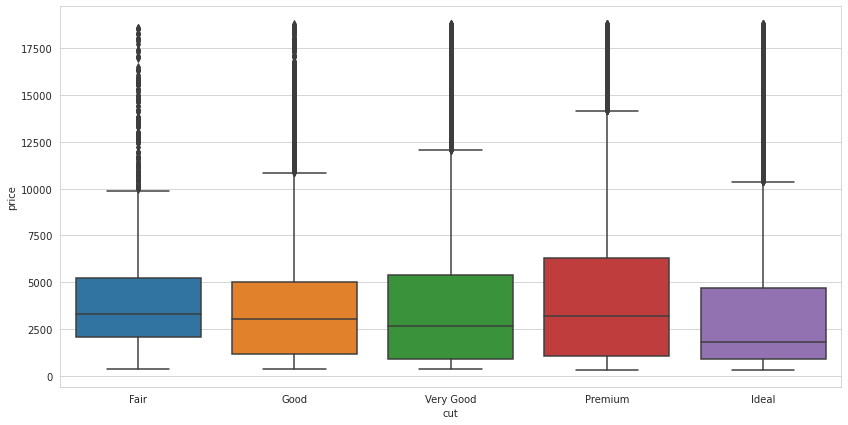

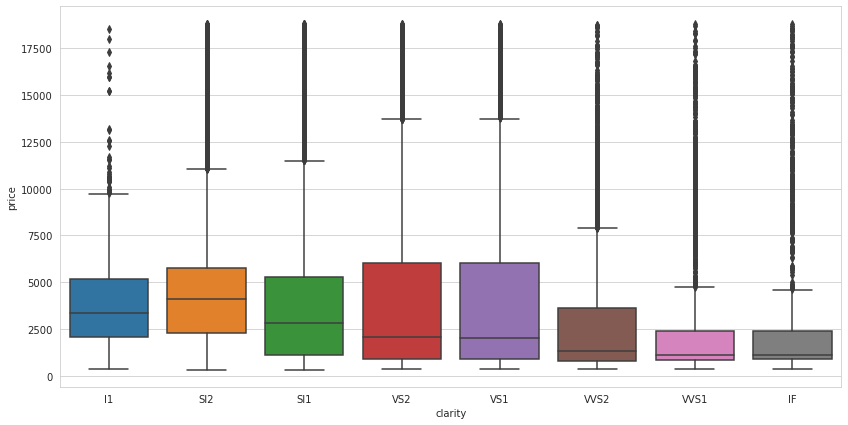

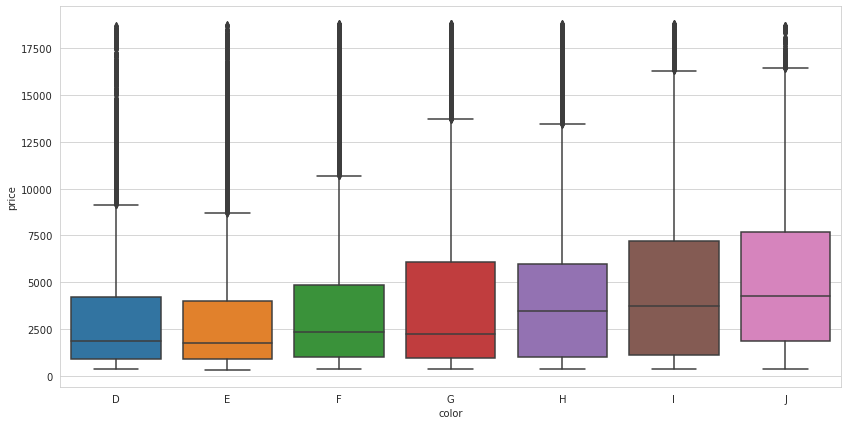

In [ ]:
EDA()

You can find that the median value is higher for the lost quality diamonds.

- In ``cut`` category, ``Fair`` is the worst but this have in median the higher price.   
- In ``color`` category, ``J`` is the worst color but this have in median the higher price.   
- In ``clarity`` category, ``I1`` and ``SI2`` are the worst but they have in median the higher price.   

> I would like a challenge In this case, Why are we using the median instead of the mean?, **please comment below**.

Lets take another insight, What if we compare the carat (weight) feature vs price?.

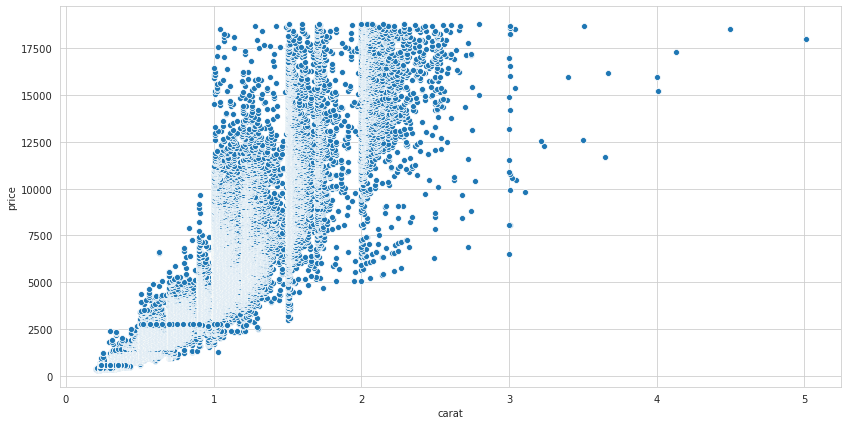

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=diamonds, x="carat", y="price")

It seems like a exponential growing, and we observe that most of the data are from carat lower than 2.5.   
Let's make a couple of tweas to the dataset in order to make it easier to work with.   

1. Focus on diamonds smaller than 2.5 carats.
2. Log transform carat and price in order to avoid the exponential relationshit between.

In [ ]:
diamonds_filtered = diamonds.query("carat < 2.5") 
diamonds_filtered["log_price"] = np.log2(diamonds_filtered["price"])
diamonds_filtered["log_carat"] = np.log2(diamonds_filtered["carat"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


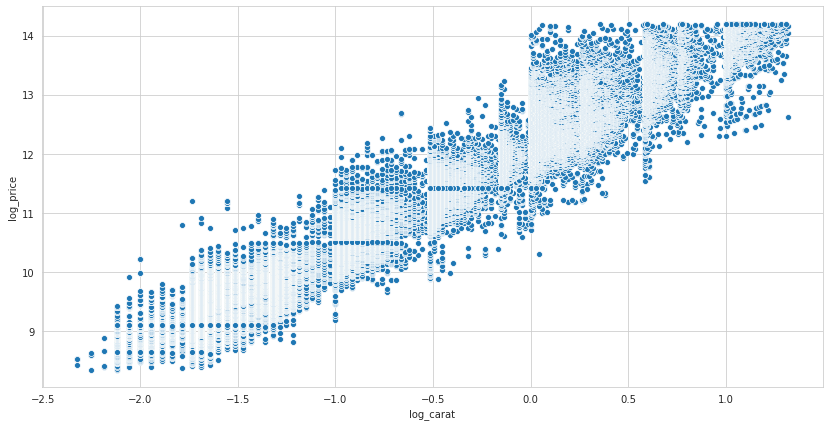

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=diamonds_filtered, x="log_carat", y="log_price")

Now, we found a possible linear relationship, now let create a linear model and evaluate the result.

R^2 of the linear regression 0.933424176354929


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<Figure size 1008x504 with 0 Axes>

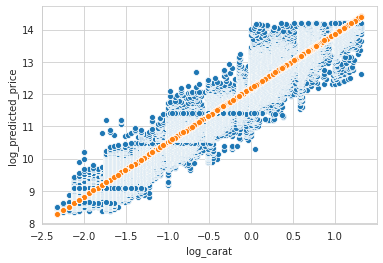

<Figure size 1008x504 with 0 Axes>

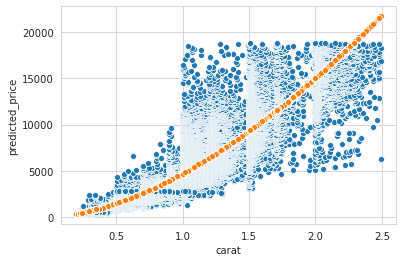

In [ ]:
X = diamonds_filtered.loc[:, "log_carat"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = diamonds_filtered.loc[:, "log_price"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = linear_model.LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
score = linear_regressor.score(X,Y)

print(f"R^2 of the linear regression {score}")

diamonds_filtered["log_predicted_price"] = linear_regressor.predict(X)  # make predictions
diamonds_filtered["predicted_price"] = diamonds_filtered["log_predicted_price"].apply(lambda x: 2**x)

plt.figure(figsize=(14,7))
fig, ax = plt.subplots()
sns.scatterplot(diamonds_filtered["log_carat"],diamonds_filtered["log_price"], ax=ax)
sns.scatterplot(diamonds_filtered["log_carat"],diamonds_filtered["log_predicted_price"], ax=ax)

plt.figure(figsize=(14,7))
fig, ax = plt.subplots()
sns.scatterplot(diamonds_filtered["carat"],diamonds_filtered["price"], ax=ax)
sns.scatterplot(diamonds_filtered["carat"],diamonds_filtered["predicted_price"], ax=ax)

Let's see the residuals, remember that a linear regression can be evaluated if the sparse of the residuals is uniform.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


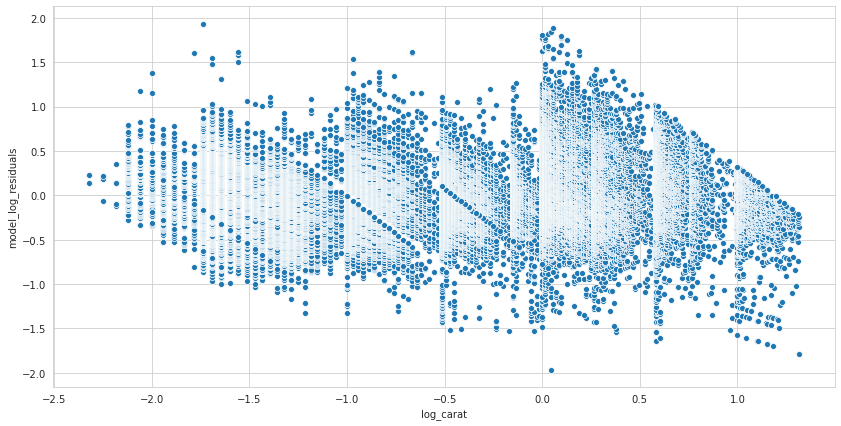

In [ ]:
diamonds_filtered["model_log_residuals"] = diamonds_filtered["log_price"]-diamonds_filtered["log_predicted_price"]
plt.figure(figsize=(14,7))
sns.scatterplot(data=diamonds_filtered, x="log_carat", y="model_log_residuals")

## Final part
Now just try the Explortory Data analysis, in this case we use the residuals instead of the price.


Median analysis by cut
           model_log_residuals
cut                           
Fair                 -0.321563
Good                 -0.143128
Ideal                 0.079089
Premium              -0.032826
Very Good            -0.042965
Median analysis by clarity
         model_log_residuals
clarity                     
I1                 -0.910154
IF                  0.446784
SI1                -0.126625
SI2                -0.278818
VS1                 0.105502
VS2                 0.062317
VVS1                0.327219
VVS2                0.292481
Median analysis by color
       model_log_residuals
color                     
D                 0.123872
E                 0.089011
F                 0.067548
G                 0.072725
H                -0.094381
I                -0.227413
J                -0.412391


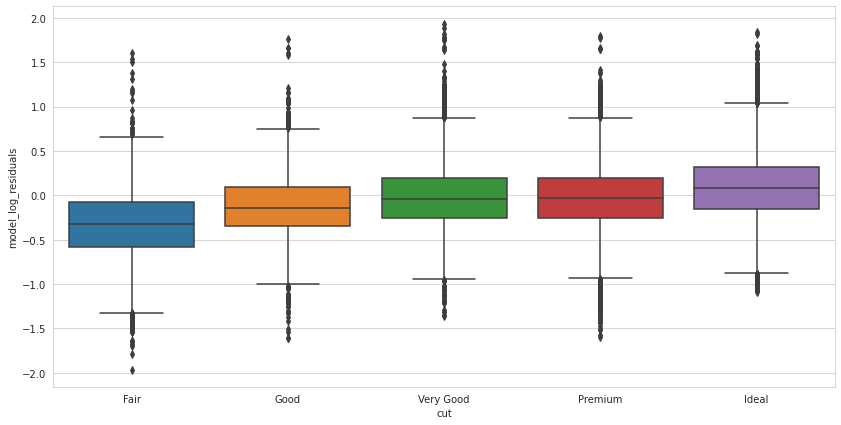

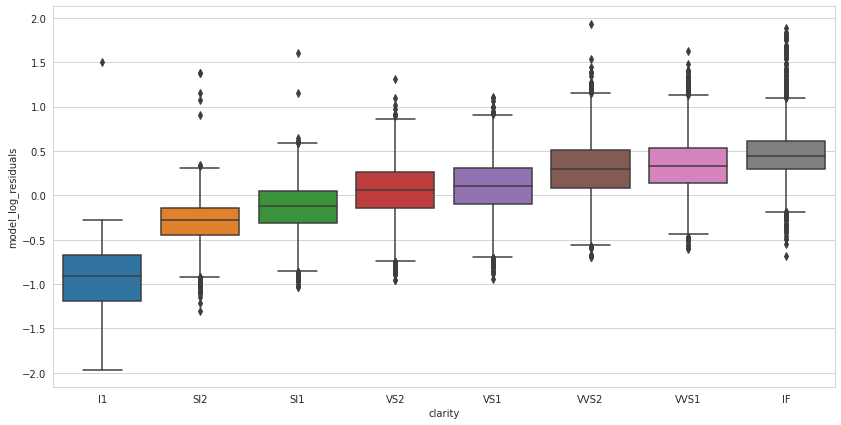

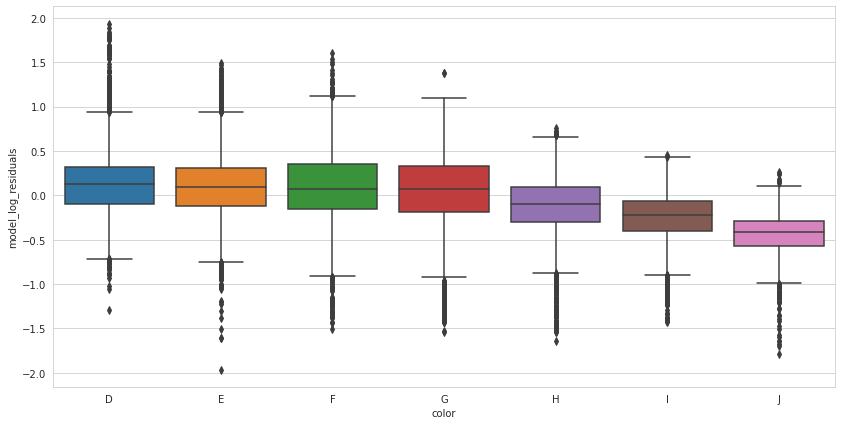

In [ ]:
EDA(diamonds_filtered,"model_log_residuals")

# > The counterintuitive part is because the poorest quality diamonds tend to be the largest, possibly used for tunneling or drilling for oil. Using the linear regression model we found a way to overcome this effect and be able to explain the phenomenon, now it is possible to create more sophisticated models that can lead to a possible model that predicts the price of a diamond.

## TAKEAWAYS

the modeling process is not only the final task of a data science project, they are also usefull to performs some twaks over the data, in order to extraxt insights or clean it. This Example is takem from "R for data science" Book, I just translate it to Python and add some personal comments.
Please let me know your thoughts below.